In [46]:
#All libraries
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [102]:
#read our file
df = pd.read_csv("StateNames.csv") 
df.head(10)

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7
5,6,Elsie,1910,F,AK,6
6,7,Lucy,1910,F,AK,6
7,8,Dorothy,1910,F,AK,5
8,9,Mary,1911,F,AK,12
9,10,Margaret,1911,F,AK,7


# 1 Task

In [10]:
# I decided to divide data for 1 task by period of time

formatted_df1 = df[df.Year.ge(1990)]

formatted_df2 = df[df.Year.le(1990)]

In [43]:
# Working with first period
# Period after 1990
# Selecting 
formatted_df1 = formatted_df1.groupby(['State'])
formatted_df1 = formatted_df1.first().sort_index().reset_index().drop_duplicates()
formatted_df1.head(10)

,State,Id,Name,Year,Gender,Count
0,AK,8496,Jessica,1990,F,112
1,AL,74832,Ashley,1990,F,824
2,AR,191003,Jessica,1990,F,453
3,AZ,280825,Jessica,1990,F,745
4,CA,468611,Jessica,1990,F,6631
5,CO,742746,Jessica,1990,F,573
6,CT,838674,Jessica,1990,F,564
7,DC,907647,Ashley,1990,F,158
8,DE,951043,Jessica,1990,F,156
9,FL,1025672,Ashley,1990,F,2373


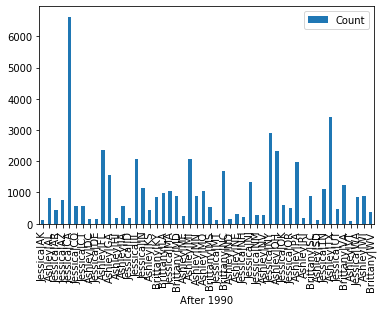

In [42]:
# Creating new column with name and state
# New df with two needed columns
# Plot
formatted_df1["Name State"] = formatted_df1["Name"] + "|"+ formatted_df1["State"]
formatted_df1 = formatted_df1[['Name State','Count']]
formatted_df1.head(10)
formatted_df1.set_index("Name State",drop=True,inplace=True)
p=formatted_df1.plot.bar()
p.set_xlabel("After 1990")
p

In [44]:
# Working with first period
# Period before 1990
# Selecting 
formatted_df2 = formatted_df2.groupby(['State'])
formatted_df2 = formatted_df2.first().sort_index().reset_index().drop_duplicates()
formatted_df2.tail(10)

,State,Id,Name,Year,Gender,Count
0,AK,1,Mary,1910,F,14
1,AL,26664,Mary,1910,F,875
2,AR,153458,Mary,1910,F,408
3,AZ,249695,Mary,1910,F,74
4,CA,356018,Mary,1910,F,295
5,CO,710231,Mary,1910,F,193
6,CT,809706,Mary,1910,F,304
7,DC,886628,Mary,1910,F,80
8,DE,939956,Mary,1910,F,59
9,FL,970379,Mary,1910,F,239


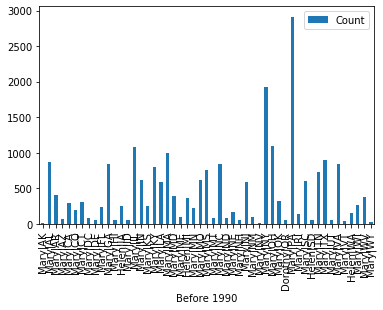

In [45]:
# Creating new column with name and state
# New df with two needed columns
# Plot
formatted_df2["Name State"] = formatted_df2["Name"] + "|"+ formatted_df2["State"]
formatted_df2 = formatted_df2[['Name State','Count']]
formatted_df2.head(10)
formatted_df2.set_index("Name State",drop=True,inplace=True)
p1=formatted_df2.plot.bar()
p1.set_xlabel("Before 1990")
p1

# 2 Task

In [95]:
# I decided to divide data for 2 task by sex and filter time period
df1 = df[df['Year'].between(1990, 2000)]

formatted_df1 = df1.loc[df1['Gender'] == 'F']

formatted_df2 = df1.loc[df1['Gender'] == 'M']

In [96]:
# Filtering...
# Preparing for heatmap
# Female
array = ['FL', 'AK', 'WY']
formatted_df1 = formatted_df1.loc[df['State'].isin(array)]
array = ['Ashley', 'Mary', 'Helen']
formatted_df1 = formatted_df1.loc[formatted_df1['Name'].isin(array)]
formatted_df1 = formatted_df1[['Name', 'State','Count']]
formatted_df1 = formatted_df1.groupby(['State','Name']).sum()
formatted_df1=formatted_df1.unstack(level=0)
formatted_df1.head(10)

Count                
State      AK       FL     WY
Name                         
Ashley  705.0  17924.0  485.0
Helen    33.0    367.0    NaN
Mary    252.0   3159.0   83.0

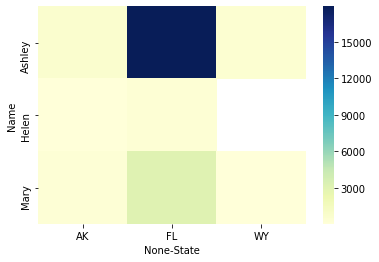

In [97]:
# Female
x_axis_labels = ["AK", "FL", "WY"]
sns.heatmap(formatted_df1, cmap="YlGnBu", xticklabels=x_axis_labels)


In [99]:
# Filtering...
# Preparing for heatmap
# Male
array = ['FL', 'AK', 'WY']
formatted_df2 = formatted_df2.loc[df['State'].isin(array)]
array = ['James', 'Ryan', 'Nathan']
formatted_df2 = formatted_df2.loc[df['Name'].isin(array)]
formatted_df2 = formatted_df2[['Name', 'State','Count']]
formatted_df2 = formatted_df2.groupby(['State','Name']).sum()
formatted_df2=formatted_df2.unstack(level=0)
formatted_df2.head(10)

Count            
State     AK     FL   WY
Name                    
James    792  13222  366
Nathan   354   3683  236
Ryan     653  11870  388

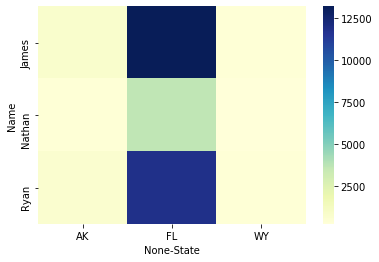

In [101]:
# Male

sns.heatmap(formatted_df2, cmap="YlGnBu", xticklabels=x_axis_labels)

# 3 Task

In [131]:
# Filter by time period, states and names
formatted_df1 = df[df.Year.ge(1990)]
array = ['FL', 'AK', 'WY']
formatted_df1 = formatted_df1.loc[df['State'].isin(array)]
array = ['Jessica', 'Mary', 'Nathan']
formatted_df1 = formatted_df1.loc[df['Name'].isin(array)]

In [132]:
# Keeping only needed columns
formatted_df1 = formatted_df1[['Name', 'Year', 'State','Count']]

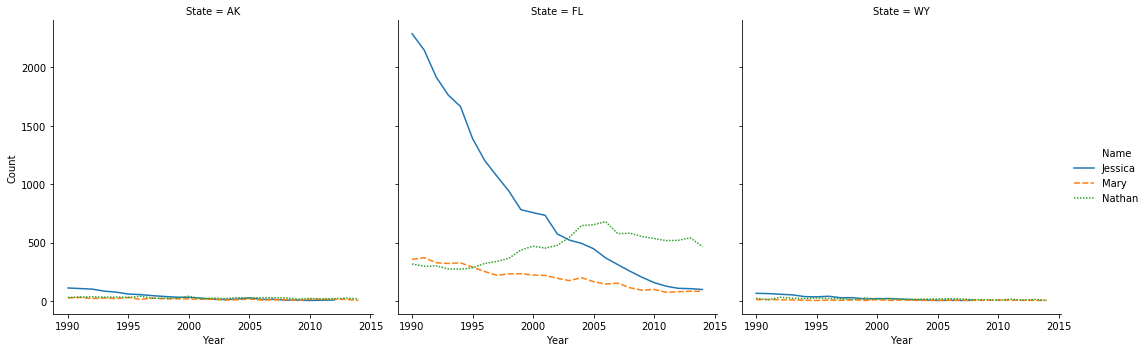

In [133]:
sns.relplot(x="Year", y="Count", hue="Name", style="Name",
            col="State", col_wrap=3,
            kind="line", data=formatted_df1);